# This is both in class-practice Lecture 12 and HW#4 which is due at 6:30PM on July 28th 2016!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/spambase.csv"
SpamData = pd.read_csv(url)
SpamData.head()
len(SpamData)

4601

In [3]:
SpamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
ListOfAllVariables = SpamData.columns.values
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']

### Earlier in this course, we used logistic regression model and could achieve 8.2% misclassification error. Now, you know few top of the line algorithms like Random Forest and boosting. Go ahead and beat the Logistic regression algorithm. The champion, the person who beats CV-error of 8.2% and makes the least amount of error will receive a ONE DOLLAR bill award! 
### Just beat it, beat it, beat it, beat it
### No one wants to be defeated
### Showin' how funky strong is your fight 
### It doesn't matter who's wrong or right 
### just boost it, bag it, boost it, beat it

If you are using **Boosting** then set **min_samples_leaf = 10** and **random_state = 24**
Also, in order to be consitent use the following way to cross-validate your errors:

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) 

scores = []

for train_index, test_index in kf:

                                  ...
                                  

If you are working with **Random Forest** then set **random_state = 24** and **min_samples_leaf = 10**. 

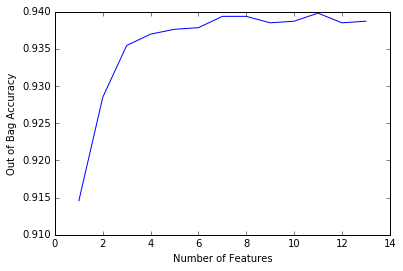

In [5]:
from sklearn.ensemble import RandomForestClassifier

Features = range(1,14)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 10, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 24,
                           n_jobs = -1)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show()             
        

In [9]:
index_Optimal_Features = np.argmax(oob_score_RF)
Optimal_Feature = Features[index_Optimal_Features]
print("The optimal level of features is %i which leads to max level of OOB accuracy of %f" %(Optimal_Feature, oob_score_RF[index_Optimal_Features]))

The optimal level of features is 11 which leads to max level of OOB accuracy of 0.939796


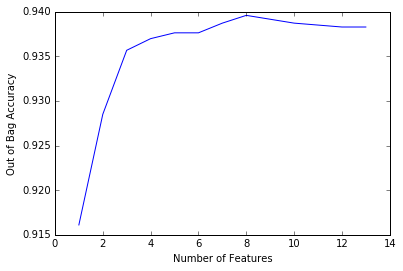

In [13]:
from sklearn.ensemble import RandomForestClassifier

Features = range(1,14)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 5000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 10, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 24,
                           n_jobs = -1)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show()           

In [15]:
index_Optimal_Features = np.argmax(oob_score_RF)
Optimal_Feature = Features[index_Optimal_Features]
print("The optimal level of features is %i which leads to max level of OOB accuracy of %f" %(Optimal_Feature, oob_score_RF[index_Optimal_Features]))

The optimal level of features is 8 which leads to max level of OOB accuracy of 0.939578


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation

Depth = range(1,5) #you never go higher than 5 depth
Score = []
for i in Depth:
    GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01,
                                      n_estimators = 1000,
                                      max_depth = i,
                                      min_samples_leaf = 10,
                                      random_state = 24)

# Unfortunately we cannot use cross_val_score in this case. cross_val_score returns log of loss which is not a 
# measure we are interested in, in this course. 

kf = cross_validation.KFold(len(SpamData), n_folds = 10, shuffle = True) #10 fold CV
scores = []
for train_index, test_index in kf:        
        GBC_Tree.fit(X.iloc[train_index], y.iloc[train_index])
        y_hat_test = GBC_Tree.predict(X.iloc[test_index]) 
        scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))
        Score_GBC_CV = np.mean(scores)  
print(Score_GBC_CV)
print(scores)


0.948049137037
[0.9739696312364425, 0.9543478260869566, 0.9369565217391305, 0.9565217391304348, 0.941304347826087, 0.9586956521739131, 0.9326086956521739, 0.9434782608695652, 0.9391304347826087, 0.9434782608695652]


With boosting, I improved the accuracy score to 0.948049137037